**Author:** Cainã Max Couto da Silva  
**LinkedIn:** [@cmcouto-silva](https://www.linkedin.com/in/cmcouto-silva/)

# **PyCaret**

[PyCaret](https://pycaret.org/) is an open-source, low-code machine learning library in Python that automates machine learning workflows.

In [ ]:
%pip install shap
%pip install pycaret

In [ ]:
import pandas as pd
from pycaret.regression import *
from pycaret.datasets import get_data

# 1. Loading dataset

In [ ]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initialize Setup

In [ ]:
s = setup(data, target='charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


# 3. Compare Baseline

In [ ]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2692.5967,23300198.0477,4824.9530,0.8363,0.4516,0.3206,0.2220
rf,Random Forest Regressor,2812.0384,25762074.6370,5073.9111,0.8185,0.4804,0.3422,0.3060
lightgbm,Light Gradient Boosting Machine,3031.2276,25889278.6083,5087.1440,0.8167,0.5249,0.3778,0.4100
ada,AdaBoost Regressor,4186.0485,28235870.1457,5310.3789,0.8023,0.6167,0.6977,0.4080
et,Extra Trees Regressor,2858.1136,28778858.5534,5355.7976,0.8006,0.4938,0.3380,0.5440
xgboost,Extreme Gradient Boosting,3215.7412,30977263.2000,5560.4064,0.7799,0.5652,0.4074,0.2100
llar,Lasso Least Angle Regression,4316.6204,38502515.9192,6193.3530,0.7346,0.6726,0.4435,0.2460
br,Bayesian Ridge,4325.2565,38508496.3681,6193.7398,0.7346,0.6509,0.4450,0.1920
lasso,Lasso Regression,4316.6205,38502498.2027,6193.3516,0.7346,0.6727,0.4435,0.4600
ridge,Ridge Regression,4332.6379,38515111.9005,6194.1822,0.7345,0.6300,0.4464,0.3120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Show best model
best_model

GradientBoostingRegressor(random_state=123)

# 4. Create model

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2896.4964,23611929.4013,4859.2108,0.8590,0.5993,0.3808
1,3075.9419,30047230.7486,5481.5354,0.8253,0.4622,0.3295
2,3090.7426,27877897.1696,5279.9524,0.6470,0.6213,0.4468
3,3247.8918,26531240.5577,5150.8485,0.7785,0.7497,0.5276
4,3263.7660,29391206.7843,5421.3658,0.7814,0.5628,0.3846
5,2930.1800,21751409.5632,4663.8406,0.8601,0.4058,0.2873
6,2733.8071,21012815.3865,4583.9738,0.8570,0.3991,0.3139
7,2865.5796,25843408.7132,5083.6413,0.8579,0.5027,0.2995
8,2715.5680,21671018.5929,4655.2141,0.8600,0.5233,0.4192


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# 5. Tune Hyperparameters

In [ ]:
# tuned_lightgbm = tune_model(lightgbm, n_iter=10, optimize='R2')

# 6. Ensemble / Blend / Stack Models

In [ ]:
# ensemble_model | blend_models | stack_models

# 7. Evaluate model

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 8. Interpret model

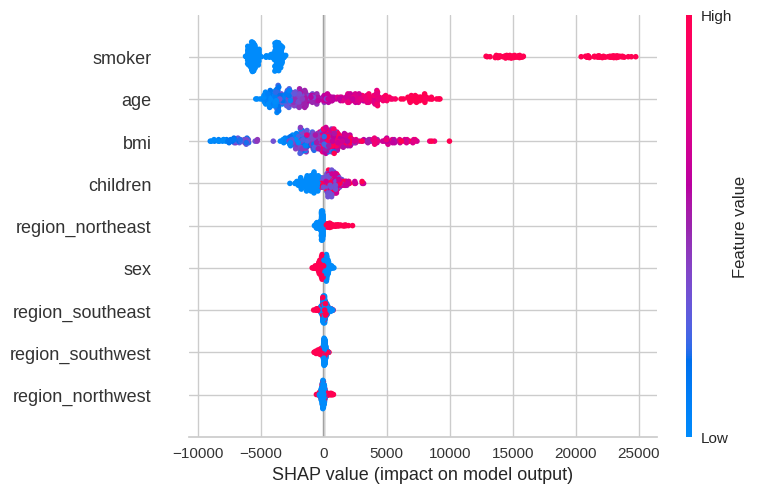

In [ ]:
interpret_model(lightgbm, plot='summary')

# 9. Finalize model

In [ ]:
final_model = finalize_model(best_model)
display(final_model)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

In [ ]:
s.X_train

,age,sex,bmi,children,smoker,region
300,36,male,27.549999,3,no,northeast
904,60,female,35.099998,0,no,southwest
670,30,male,31.570000,3,no,southeast
617,49,male,25.600000,2,yes,southwest
373,26,male,32.900002,2,yes,southwest
...,...,...,...,...,...,...
1238,37,male,22.705000,3,no,northeast
1147,20,female,31.920000,0,no,northwest
106,19,female,28.400000,1,no,southwest
1041,18,male,23.084999,0,no,northeast


In [ ]:
s.X_train_transformed

,age,sex,bmi,children,smoker,region_northeast,region_southwest,region_southeast,region_northwest
300,36.0,1.0,27.549999,3.0,0.0,1.0,0.0,0.0,0.0
904,60.0,0.0,35.099998,0.0,0.0,0.0,1.0,0.0,0.0
670,30.0,1.0,31.570000,3.0,0.0,0.0,0.0,1.0,0.0
617,49.0,1.0,25.600000,2.0,1.0,0.0,1.0,0.0,0.0
373,26.0,1.0,32.900002,2.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1238,37.0,1.0,22.705000,3.0,0.0,1.0,0.0,0.0,0.0
1147,20.0,0.0,31.920000,0.0,0.0,0.0,0.0,0.0,1.0
106,19.0,0.0,28.400000,1.0,0.0,0.0,1.0,0.0,0.0
1041,18.0,1.0,23.084999,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
s.pipeline

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                                     'smoker'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'sex',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True)))])